In [2]:
import pandas as pd
import datetime
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
        #print(dfs[-1])
    return pd.concat(dfs)
        




In [3]:
## IMPORTING in df1 MTA DATA FOR YEAR 2021
week_nums = [211225, 211218, 211211, 211204,
             211127, 211120, 211113, 211106,
             211030, 211023, 211016, 211009, 211002,
             210925, 210918, 210911, 210904,
             210828, 210821, 210814, 210807,
             210731, 210724, 210717, 210710, 210703,
             210626, 210619, 210612, 210605,
             210529, 210522, 210515, 210508, 210501,
             210424, 210417, 210410, 210403,
             210327, 210320, 210313, 210306,
             210227, 210220, 210213, 210206,
             210130, 210123, 210116, 210109, 210102
            ]
df1 = get_data(week_nums)
df1.columns = [column.strip() for column in df1.columns]
df1["DATE_TIME"] = pd.to_datetime(df1.DATE + " " + df1.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
df1.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df1.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)






In [4]:
## IMPORTING in df2 MTA DATA FOR YEAR 2019
week_nums = [191228, 191221, 191214, 191207,
             191130, 191123, 191116, 191109,191102,
             191026, 191019, 191012, 191005,
             190928, 190921, 190914, 190907,
             190831, 190824, 190817, 190810,190803,
             190727, 190720, 190713, 190706, 
             190629, 190622, 190615, 190608, 190601,
             190525, 190518, 190511, 190504,
             190427, 190420, 190413, 190406,
             190330, 190323, 190316, 190309,190302,
             190223, 190216, 190209, 190202,
             190126, 190119, 190112, 190105
            ]

df2 = get_data(week_nums)
df2.columns = [column.strip() for column in df2.columns]
df2["DATE_TIME"] = pd.to_datetime(df2.DATE + " " + df2.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
df2.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df2.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)





In [5]:
## IMPORTING in df3 MTA DATA FOR YEAR 2020
week_nums = [201226, 201219, 201212, 201205,
             201128, 201121, 201114, 201107,
             201031, 201024, 201017, 201010, 201003,
             200926, 200919, 200912, 200905,
             200829, 200822, 200815, 200808, 200801,
             200725, 200718, 200711, 200704,
             200627, 200620, 200613, 200606,
             200530, 200523, 200516, 200509, 200502,
             200425, 200418, 200411, 200404,
             200328, 200321, 200314, 200307,
             200229, 200222, 200215, 200208, 200201,
             200125, 200118, 200111, 200104]
df3 = get_data(week_nums)
df3.columns = [column.strip() for column in df3.columns]
df3["DATE_TIME"] = pd.to_datetime(df3.DATE + " " + df3.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
df3.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df3.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)



In [6]:
#REFERENCE FROM MTA EXERCISE 2 SOLUTION -- TAKING CARE IF CUMULATIVE COUNTER GET RESET TO ZERO OR A MAX COUNTER NUMBER
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter: 
        counter = min(row["EXITS"], row["PREV EXITS"])
    if counter > max_counter:
       return 0
    return counter

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
196993,R534,R055,01-05-01,FLUSHING-MAIN,7,IRT,12/24/2021,23:00:00,REGULAR,262144,276,2021-12-24 23:00:00
196992,R534,R055,01-05-01,FLUSHING-MAIN,7,IRT,12/24/2021,19:00:00,REGULAR,262144,276,2021-12-24 19:00:00
196991,R534,R055,01-05-01,FLUSHING-MAIN,7,IRT,12/24/2021,15:00:00,REGULAR,262144,276,2021-12-24 15:00:00
196990,R534,R055,01-05-01,FLUSHING-MAIN,7,IRT,12/24/2021,11:00:00,REGULAR,262144,274,2021-12-24 11:00:00
196989,R534,R055,01-05-01,FLUSHING-MAIN,7,IRT,12/24/2021,07:00:00,REGULAR,262144,273,2021-12-24 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
195961,R533,R055,00-00-00,FLUSHING-MAIN,7,IRT,12/26/2020,16:33:48,REGULAR,9922129,21147600,2020-12-26 16:33:48
195960,R533,R055,00-00-00,FLUSHING-MAIN,7,IRT,12/26/2020,15:00:00,REGULAR,9922060,21147534,2020-12-26 15:00:00
195959,R533,R055,00-00-00,FLUSHING-MAIN,7,IRT,12/26/2020,11:00:00,REGULAR,9921929,21147349,2020-12-26 11:00:00
195958,R533,R055,00-00-00,FLUSHING-MAIN,7,IRT,12/26/2020,07:00:00,REGULAR,9921795,21147203,2020-12-26 07:00:00


DIVISION     27
DATE         27
TIME         27
DESC         27
ENTRIES      27
EXITS        27
DATE_TIME    27
dtype: int64

In [7]:
#FINDING DAILY EXITS FOR DF1 (YEAR 2021) ; CHOSEN MAX_COUNTER DEPENDING ON NO OF EXITS 
#AS PERCENT TO TOTAL EXITS

df1_daily= df1.groupby(['C/A','UNIT','SCP','STATION','DATE',"LINENAME"], as_index = False).EXITS.first()
df1_daily[['PREV DATE','PREV EXITS']] = df1_daily.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE', 'EXITS'].apply(lambda x: x.shift(1))
df1_daily.dropna(subset = ["PREV DATE"], axis = 0,inplace = True)
df1_daily["DAILY EXITS"]= df1_daily.apply(get_daily_counts, axis=1, max_counter=400000)

df1_daily.drop(df1_daily[(df1_daily['DATE'].astype('datetime64').dt.year == 2020)].index , axis = 0, inplace = True)



/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_70685/2970520451.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1_daily[['PREV DATE','PREV EXITS']] = df1_daily.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE', 'EXITS'].apply(lambda x: x.shift(1))


In [8]:
#FINDING DAILY EXITS FOR DF2 (YEAR 2019) ; CHOSEN MAX_COUNTER DEPENDING ON NO OF EXITS 
#AS PERCENT TO TOTAL EXITS


df2_daily= df2.groupby(['C/A','UNIT','SCP','STATION','DATE',"LINENAME"], as_index = False).EXITS.first()
df2_daily[['PREV DATE','PREV EXITS']] = df2_daily.groupby(['C/A','UNIT','SCP','STATION',"LINENAME"])['DATE', 'EXITS'].apply(lambda x: x.shift(1))
df2_daily.dropna(subset = ["PREV DATE"], axis = 0,inplace = True)
df2_daily["DAILY EXITS"]= df2_daily.apply(get_daily_counts, axis=1, max_counter=400000)

df2_daily.drop(df2_daily[(df2_daily['DATE'].astype('datetime64').dt.year == 2018)].index , axis = 0, inplace = True)




/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_70685/4110892373.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2_daily[['PREV DATE','PREV EXITS']] = df2_daily.groupby(['C/A','UNIT','SCP','STATION',"LINENAME"])['DATE', 'EXITS'].apply(lambda x: x.shift(1))


In [9]:
#FINDING DAILY EXITS FOR DF3 (YEAR 2020) ; CHOSEN MAX_COUNTER DEPENDING ON NO OF EXITS 
#AS PERCENT TO TOTAL EXITS


df3_daily= df3.groupby(['C/A','UNIT','SCP','STATION','DATE',"LINENAME"], as_index = False).EXITS.first()
df3_daily[['PREV DATE','PREV EXITS']] = df3_daily.groupby(['C/A','UNIT','SCP','STATION',"LINENAME"])['DATE', 'EXITS'].apply(lambda x: x.shift(1))
df3_daily.dropna(subset = ["PREV DATE"], axis = 0,inplace = True)
df3_daily["DAILY EXITS"]= df3_daily.apply(get_daily_counts, axis=1, max_counter=400000)

df3_daily.drop(df3_daily[(df3_daily['DATE'].astype('datetime64').dt.year == 2019)].index , axis = 0, inplace = True)

/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_70685/3097606754.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3_daily[['PREV DATE','PREV EXITS']] = df3_daily.groupby(['C/A','UNIT','SCP','STATION',"LINENAME"])['DATE', 'EXITS'].apply(lambda x: x.shift(1))


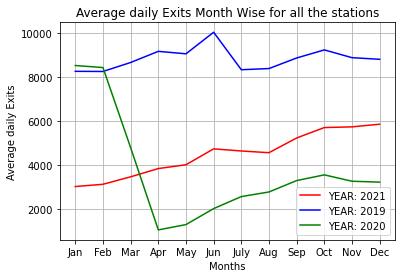

In [11]:
import matplotlib.pyplot as plt

station_exits1 = df1_daily.groupby(['STATION'"",'LINENAME','DATE'])['DAILY EXITS'].sum().reset_index()
station_exits2 = df2_daily.groupby(['STATION','LINENAME','DATE'])['DAILY EXITS'].sum().reset_index()
station_exits3 = df3_daily.groupby(['STATION','LINENAME','DATE'])['DAILY EXITS'].sum().reset_index()
#station_exits.sample(5)

station_exits1["DATE"] = pd.to_datetime(station_exits1["DATE"],format='%m/%d/%Y')
station_exits1["MONTH"] = station_exits1["DATE"].astype('datetime64').dt.month
avg_exits_month1 = station_exits1.groupby("MONTH")["DAILY EXITS"].mean()

station_exits2["DATE"] = pd.to_datetime(station_exits2["DATE"],format='%m/%d/%Y')
station_exits2["MONTH"] = station_exits2["DATE"].astype('datetime64').dt.month
avg_exits_month2 = station_exits2.groupby("MONTH")["DAILY EXITS"].mean()

station_exits3["DATE"] = pd.to_datetime(station_exits3["DATE"],format='%m/%d/%Y')
station_exits3["MONTH"] = station_exits3["DATE"].astype('datetime64').dt.month
avg_exits_month3 = station_exits3.groupby("MONTH")["DAILY EXITS"].mean()


#print(avg_enteries_month1)
plt.plot(avg_exits_month1, label = 'YEAR: 2021', color = 'red')
plt.plot(avg_exits_month2, label = 'YEAR: 2019', color = 'blue')
plt.plot(avg_exits_month3, label = 'YEAR: 2020', color = 'green')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb', 'Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("Months")
plt.ylabel("Average daily Exits")
plt.title("Average daily Exits Month Wise for all the stations")
plt.grid()
plt.legend()
plt.show()

In [ ]:
#station_entries1.sample(10)
average_exits_station_month = station_exits1.groupby(["STATION","LINENAME"])["DAILY EXITS"].sum().sort_values(ascending = False).reset_index()
(average_exits_station_month.head(20))

In [ ]:
#station_entries1.sample(10)
average_enteries_station_month = station_entries1.groupby(["STATION","LINENAME"])["DAILY EXITS"].sum().sort_values(ascending = False).reset_index()
(average_enteries_station_month.head(20))
-------------------------------
STATION	LINENAME	DAILY EXITS
0	34 ST-HERALD SQ	BDFMNQRW	15381479.0
1	GRD CNTRL-42 ST	4567S	15208087.0
2	PATH NEW WTC	1	11210231.0
3	42 ST-PORT AUTH	ACENQRS1237W	10956267.0
4	34 ST-PENN STA	ACE	10715533.0
5	FLUSHING-MAIN	7	9339855.0
6	14 ST-UNION SQ	LNQR456W	8579627.0
7	FULTON ST	2345ACJZ	8063659.0
8	TIMES SQ-42 ST	1237ACENQRSW	7501365.0
9	JKSN HT-ROOSVLT	EFMR7	7402163.0
10	86 ST	456	7026998.0
11	59 ST	456NQRW	


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

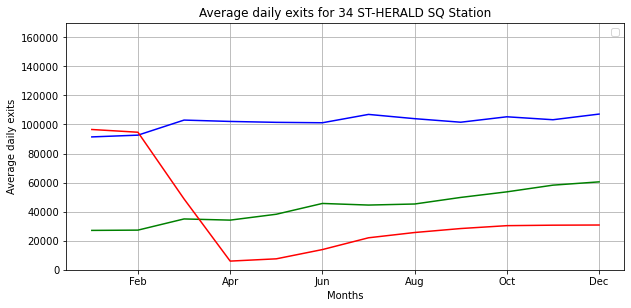

No handles with labels found to put in legend.


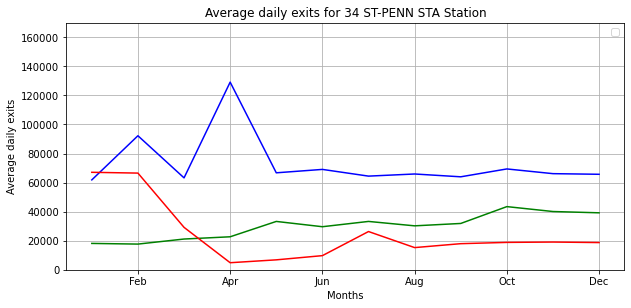

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

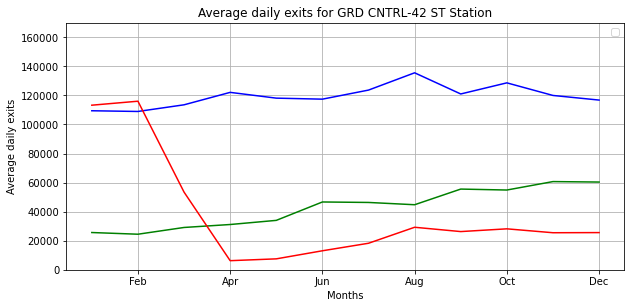

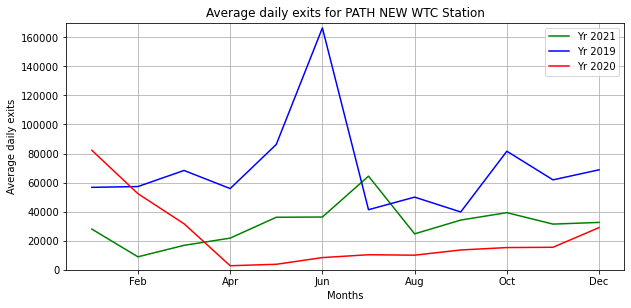

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

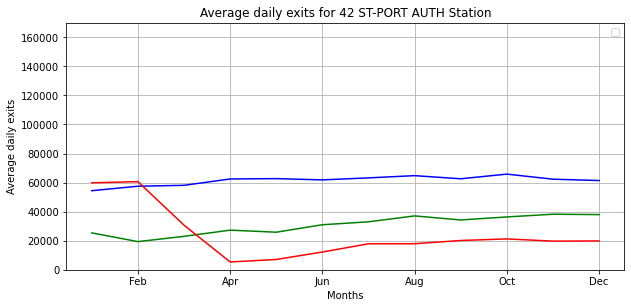

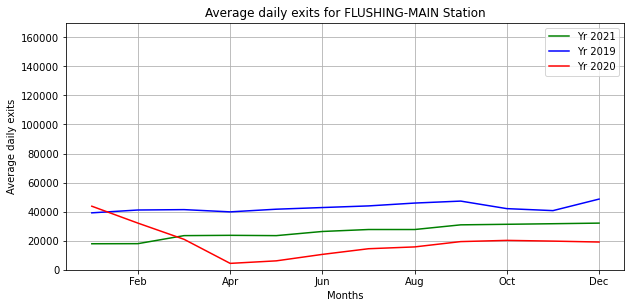

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

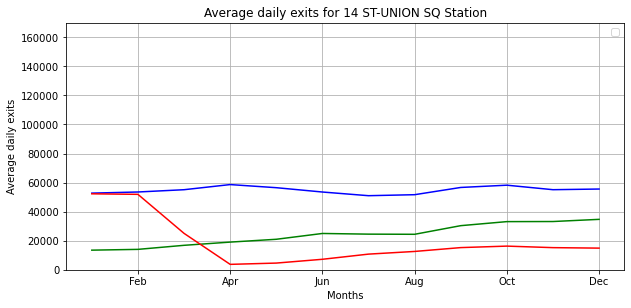

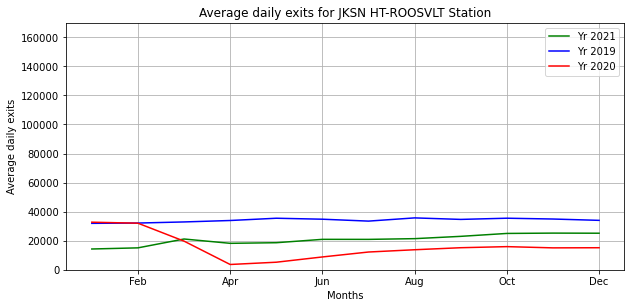

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

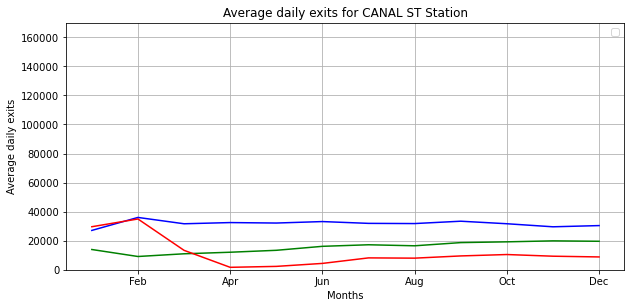

In [21]:
import matplotlib.pyplot as plt


mask11  = ((station_exits1['LINENAME'] == 'BDFMNQRW') & (station_exits1['STATION'] == '34 ST-HERALD SQ'))
mask12  = ((station_exits2['LINENAME'] == 'BDFMNQRW') & (station_exits2['STATION'] == '34 ST-HERALD SQ'))
mask13  = ((station_exits3['LINENAME'] == 'BDFMNQRW') & (station_exits3['STATION'] == '34 ST-HERALD SQ'))

mask21  = ((station_exits1['LINENAME'] == 'ACE') & (station_exits1['STATION'] == '34 ST-PENN STA'))
mask22  = ((station_exits2['LINENAME'] == 'ACE') & (station_exits2['STATION'] == '34 ST-PENN STA'))
mask23  = ((station_exits3['LINENAME'] == 'ACE') & (station_exits3['STATION'] == '34 ST-PENN STA'))

mask31  = ((station_exits1['LINENAME'] == '4567S') & (station_exits1['STATION'] == 'GRD CNTRL-42 ST'))
mask32  = ((station_exits2['LINENAME'] == '4567S') & (station_exits2['STATION'] == 'GRD CNTRL-42 ST'))
mask33  = ((station_exits3['LINENAME'] == '4567S') & (station_exits3['STATION'] == 'GRD CNTRL-42 ST'))

mask41  = ((station_exits1['LINENAME'] == '1') & (station_exits1['STATION'] == 'PATH NEW WTC'))
mask42  = ((station_exits2['LINENAME'] == '1') & (station_exits2['STATION'] == 'PATH NEW WTC'))
mask43  = ((station_exits3['LINENAME'] == '1') & (station_exits3['STATION'] == 'PATH NEW WTC'))

mask51  = ((station_exits1['LINENAME'] == 'ACENQRS1237W') & (station_exits1['STATION'] == '42 ST-PORT AUTH'))
mask52  = ((station_exits2['LINENAME'] == 'ACENQRS1237W') & (station_exits2['STATION'] == '42 ST-PORT AUTH'))
mask53  = ((station_exits3['LINENAME'] == 'ACENQRS1237W') & (station_exits3['STATION'] == '42 ST-PORT AUTH'))

mask61  = ((station_exits1['LINENAME'] == '7') & (station_exits1['STATION'] == 'FLUSHING-MAIN'))
mask62  = ((station_exits2['LINENAME'] == '7') & (station_exits2['STATION'] == 'FLUSHING-MAIN'))
mask63  = ((station_exits3['LINENAME'] == '7') & (station_exits3['STATION'] == 'FLUSHING-MAIN'))

mask71  = ((station_exits1['LINENAME'] == 'LNQR456W') & (station_exits1['STATION'] == '14 ST-UNION SQ'))
mask72  = ((station_exits2['LINENAME'] == 'LNQR456W') & (station_exits2['STATION'] == '14 ST-UNION SQ'))
mask73  = ((station_exits3['LINENAME'] == 'LNQR456W') & (station_exits3['STATION'] == '14 ST-UNION SQ'))

mask81  = ((station_exits1['LINENAME'] == 'EFMR7') & (station_exits1['STATION'] == 'JKSN HT-ROOSVLT'))
mask82  = ((station_exits2['LINENAME'] == 'EFMR7') & (station_exits2['STATION'] == 'JKSN HT-ROOSVLT'))
mask83  = ((station_exits3['LINENAME'] == 'EFMR7') & (station_exits3['STATION'] == 'JKSN HT-ROOSVLT'))

mask91  = ((station_exits1['LINENAME'] == 'JNQRZ6W') & (station_exits1['STATION'] == 'CANAL ST'))
mask92  = ((station_exits2['LINENAME'] == 'JNQRZ6W') & (station_exits2['STATION'] == 'CANAL ST'))
mask93  = ((station_exits3['LINENAME'] == 'JNQRZ6W') & (station_exits3['STATION'] == 'CANAL ST'))


""""""

station_exits4 = station_exits1[mask11].groupby("MONTH")['DAILY EXITS'].mean()
station_exits5 = station_exits2[mask12].groupby("MONTH")['DAILY EXITS'].mean()
station_exits6 = station_exits3[mask13].groupby("MONTH")['DAILY EXITS'].mean()



###################1111
plt.figure(1)
plt.figure(figsize=(10, 10)) 

plt.subplot(211)
plt.plot(station_exits4,color ='green') 
#label = 'Yr 2021', color ='green')
plt.plot(station_exits5,color ='blue') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_exits6,color ='red') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.ylim(0,170000)
plt.xlabel("Months")
plt.ylabel("Average daily exits")
plt.grid()
plt.title("Average daily exits for 34 ST-HERALD SQ Station")
plt.legend()


plt.show()
###############################22222
station_exits4 = station_exits1[mask21].groupby("MONTH")['DAILY EXITS'].mean()
station_exits5 = station_exits2[mask22].groupby("MONTH")['DAILY EXITS'].mean()
station_exits6 = station_exits3[mask23].groupby("MONTH")['DAILY EXITS'].mean()


plt.figure(figsize=(10, 10))

plt.subplot(212)
plt.plot(station_exits4,color ='green') 
#label = 'Yr 2021', color ='green')
plt.plot(station_exits5,color ='blue') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_exits6,color ='red') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.xlabel("Months")
plt.ylim(0,170000)
plt.ylabel("Average daily exits")
plt.grid()
plt.title("Average daily exits for 34 ST-PENN STA Station")
plt.legend()

plt.show()

##########################################33333
station_exits4 = station_exits1[mask31].groupby("MONTH")['DAILY EXITS'].mean()
station_exits5 = station_exits2[mask32].groupby("MONTH")['DAILY EXITS'].mean()
station_exits6 = station_exits3[mask33].groupby("MONTH")['DAILY EXITS'].mean()

plt.figure(2)
plt.figure(figsize=(10, 10)) 

plt.subplot(211)
plt.plot(station_exits4,color ='green') 
#label = 'Yr 2021', color ='green')
plt.plot(station_exits5,color ='blue') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_exits6,color ='red') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.ylim(0,170000)
plt.xlabel("Months")
plt.ylabel("Average daily exits")
plt.grid()
plt.title("Average daily exits for GRD CNTRL-42 ST Station")
plt.legend()

plt.show()

""""""
###############################44444

station_exits4 = station_exits1[mask41].groupby("MONTH")['DAILY EXITS'].mean()
station_exits5 = station_exits2[mask42].groupby("MONTH")['DAILY EXITS'].mean()
station_exits6 = station_exits3[mask43].groupby("MONTH")['DAILY EXITS'].mean()


plt.figure(figsize=(10, 10))

plt.subplot(212)
plt.plot(station_exits4,color ='green',label = 'Yr 2021') 
#label = 'Yr 2021', color ='green')
plt.plot(station_exits5,color ='blue',label = 'Yr 2019') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_exits6,color ='red',label = 'Yr 2020') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.xlabel("Months")
plt.ylim(0,170000)
plt.ylabel("Average daily exits")
plt.grid()
plt.title("Average daily exits for PATH NEW WTC Station")
plt.legend()

plt.show()

""""""
##########################################55555

station_exits4 = station_exits1[mask51].groupby("MONTH")['DAILY EXITS'].mean()
station_exits5 = station_exits2[mask52].groupby("MONTH")['DAILY EXITS'].mean()
station_exits6 = station_exits3[mask53].groupby("MONTH")['DAILY EXITS'].mean()

plt.figure(3)
plt.figure(figsize=(10, 10)) 

plt.subplot(211)
plt.plot(station_exits4,color ='green') 
#label = 'Yr 2021', color ='green')
plt.plot(station_exits5,color ='blue') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_exits6,color ='red') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.ylim(0,170000)
plt.xlabel("Months")
plt.ylabel("Average daily exits")
plt.grid()
plt.title("Average daily exits for 42 ST-PORT AUTH Station")
plt.legend()

plt.show()

""""""
###############################66666

station_exits4 = station_exits1[mask61].groupby("MONTH")['DAILY EXITS'].mean()
station_exits5 = station_exits2[mask62].groupby("MONTH")['DAILY EXITS'].mean()
station_exits6 = station_exits3[mask63].groupby("MONTH")['DAILY EXITS'].mean()


plt.figure(figsize=(10, 10))

plt.subplot(212)
plt.plot(station_exits4,color ='green',label = 'Yr 2021') 
#label = 'Yr 2021', color ='green')
plt.plot(station_exits5,color ='blue',label = 'Yr 2019') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_exits6,color ='red',label = 'Yr 2020') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.xlabel("Months")
plt.ylim(0,170000)
plt.ylabel("Average daily exits")
plt.grid()
plt.title("Average daily exits for FLUSHING-MAIN Station")
plt.legend()

plt.show()

""""""
##########################################77777777

station_exits4 = station_exits1[mask71].groupby("MONTH")['DAILY EXITS'].mean()
station_exits5 = station_exits2[mask72].groupby("MONTH")['DAILY EXITS'].mean()
station_exits6 = station_exits3[mask73].groupby("MONTH")['DAILY EXITS'].mean()

plt.figure(3)
plt.figure(figsize=(10, 10)) 

plt.subplot(211)
plt.plot(station_exits4,color ='green') 
#label = 'Yr 2021', color ='green')
plt.plot(station_exits5,color ='blue') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_exits6,color ='red') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.ylim(0,170000)
plt.xlabel("Months")
plt.ylabel("Average daily exits")
plt.grid()
plt.title("Average daily exits for 14 ST-UNION SQ Station")
plt.legend()

plt.show()

""""""
###############################88888888

station_exits4 = station_exits1[mask81].groupby("MONTH")['DAILY EXITS'].mean()
station_exits5 = station_exits2[mask82].groupby("MONTH")['DAILY EXITS'].mean()
station_exits6 = station_exits3[mask83].groupby("MONTH")['DAILY EXITS'].mean()


plt.figure(figsize=(10, 10))

plt.subplot(212)
plt.plot(station_exits4,color ='green',label = 'Yr 2021') 
#label = 'Yr 2021', color ='green')
plt.plot(station_exits5,color ='blue',label = 'Yr 2019') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_exits6,color ='red',label = 'Yr 2020') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.xlabel("Months")
plt.ylim(0,170000)
plt.ylabel("Average daily exits")
plt.grid()
plt.title("Average daily exits for JKSN HT-ROOSVLT Station")
plt.legend()

plt.show()

##########################################9999999

station_exits4 = station_exits1[mask91].groupby("MONTH")['DAILY EXITS'].mean()
station_exits5 = station_exits2[mask92].groupby("MONTH")['DAILY EXITS'].mean()
station_exits6 = station_exits3[mask93].groupby("MONTH")['DAILY EXITS'].mean()

plt.figure(3)
plt.figure(figsize=(10, 10)) 

plt.subplot(211)
plt.plot(station_exits4,color ='green') 
#label = 'Yr 2021', color ='green')
plt.plot(station_exits5,color ='blue') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_exits6,color ='red') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.ylim(0,170000)
plt.xlabel("Months")
plt.ylabel("Average daily exits")
plt.grid()
plt.title("Average daily exits for CANAL ST Station")
plt.legend()

plt.show()

##########################################10

###############################END




In [39]:
df1_counter.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
196993,R534,R055,01-05-01,FLUSHING-MAIN,7,IRT,12/24/2021,23:00:00,REGULAR,262144,276,2021-12-24 23:00:00
196992,R534,R055,01-05-01,FLUSHING-MAIN,7,IRT,12/24/2021,19:00:00,REGULAR,262144,276,2021-12-24 19:00:00
196991,R534,R055,01-05-01,FLUSHING-MAIN,7,IRT,12/24/2021,15:00:00,REGULAR,262144,276,2021-12-24 15:00:00
196990,R534,R055,01-05-01,FLUSHING-MAIN,7,IRT,12/24/2021,11:00:00,REGULAR,262144,274,2021-12-24 11:00:00
196989,R534,R055,01-05-01,FLUSHING-MAIN,7,IRT,12/24/2021,07:00:00,REGULAR,262144,273,2021-12-24 07:00:00
196988,R534,R055,01-05-01,FLUSHING-MAIN,7,IRT,12/24/2021,03:00:00,REGULAR,262144,273,2021-12-24 03:00:00
196987,R534,R055,01-05-01,FLUSHING-MAIN,7,IRT,12/23/2021,23:00:00,REGULAR,262144,273,2021-12-23 23:00:00
196986,R534,R055,01-05-01,FLUSHING-MAIN,7,IRT,12/23/2021,19:00:00,REGULAR,262144,273,2021-12-23 19:00:00
196985,R534,R055,01-05-01,FLUSHING-MAIN,7,IRT,12/23/2021,15:00:00,REGULAR,262144,272,2021-12-23 15:00:00
196984,R534,R055,01-05-01,FLUSHING-MAIN,7,IRT,12/23/2021,11:00:00,REGULAR,262144,270,2021-12-23 11:00:00
